In [1]:
import numpy as np
import functions_eq_mag as fc
import functions_fatiando as ft
from timeit import default_timer as time
from matplotlib import pyplot as plt
%matplotlib inline

## Flops count Classical Vs. CGLS Vs. CGLS_BCCB

In [2]:
N = np.arange(10000.,1010000,10000)
it = 50
k = 5

### Classical (Cholesky Factorization)

In [3]:
classical = 5/6 * (N**3) + 4 * (N**2)
#classical = (N + N/3)*N**2

### Window (Leão, 1989)

In [13]:
N_w = 49
M_w = 225
#W = (N-np.sqrt(M_l))**2
window = N*2*N_w + 2*N_w*M_w + N_w**3 + 2*N_w + 2*N_w*M_w*(N_w * M_w)

### Fast eq. layer (Siqueira, 2017)

In [5]:
siqueira = it*(3*N + 2*N**2)

### Fast eq. layer toeplitz (Takahashi, 2020)

In [6]:
taka = it*(27*N + k*8*N*np.log2(4*N))

### CGLS

In [7]:
cgls = 2 * (N**2) + it * (4 * N**2 + 12 * N)

### CGLS_BCCB

In [8]:
cgls_bccb = k * 16 * N * np.log2(4*N) + 24 * N + it * (k * 16 * N * np.log2(4*N) + 60 * N)

### Deconvolution

In [9]:
decon = k * 12 * N * np.log2(4*N) + 24 * N
decon_wiener = k * 12 * N * np.log2(4*N) + 76 * N

### PEL

In [10]:
# Para um polinômio de primeira ordem, alpha = 1
P, Q = 3, N/1000
H, M_s = P*Q, N/Q

pel = 1/3 * (H**3) + 2 * (H**2) + 2*N*M_s*H + H*H*N + 2*N*H + 2*N*P

### Wavelet

In [11]:
# Consider a 98% compression rate af matrix A using the wavelet and a log2(N) complexity for the transforming operation
C_r = N*0.02
#wave = 2 * (N*a) + 4 * N * np.log2(N) + it * (4 * N * np.log2(N) + 4 * N*a + 12 * a)
#wave = 2 * (N*a) + 4 * np.log2(N) + it * (4 * np.log2(N) + 4 * N*a + 12 * a)
wave = 2*N*N + 4*N + 2 * (N*C_r) + 4 * N * np.log2(N) + it * (4 * N * np.log2(N) + 4 * N*C_r + 12 * C_r)

### Plot Flops Count

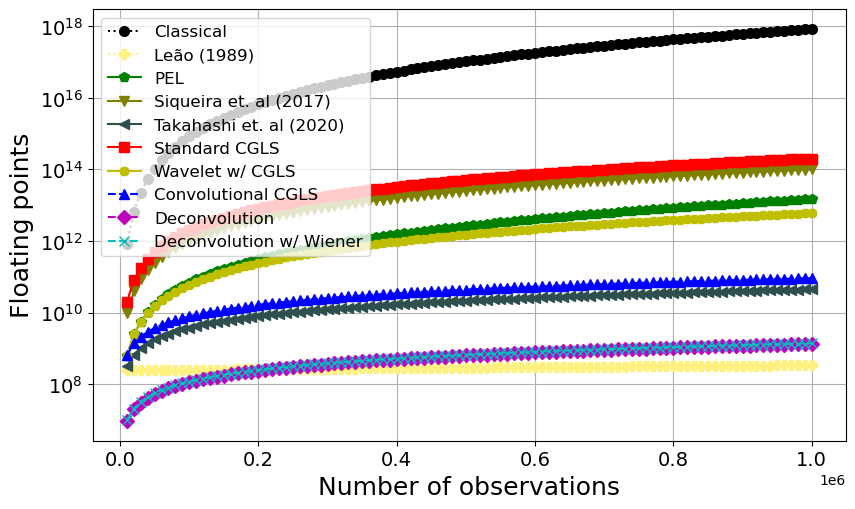

In [15]:
height=6.
width = 10.
height_per_width = height/width
fig = plt.figure(figsize=(4.33*2,4.33*height_per_width*2))
fig.patch.set_facecolor('xkcd:white')
plt.semilogy(N, classical, 'ko:', alpha=1, markersize=7, label='Classical')
plt.semilogy(N, window, 'P:', color = '#fff08080', alpha=1, markersize=7, label='Leão (1989)')
plt.semilogy(N, pel, 'gp-', alpha=1, markersize=7, label='PEL')

plt.semilogy(N, siqueira, 'v-', color = 'olive', alpha=1, markersize=7, label='Siqueira et. al (2017)')
plt.semilogy(N, taka, '<-', color = 'darkslategrey', alpha=1, markersize=7, label='Takahashi et. al (2020)')

plt.semilogy(N, cgls, 'rs-', alpha=1, markersize=7, label='Standard CGLS')
plt.semilogy(N, wave, 'y8-', alpha=1, markersize=7, label='Wavelet w/ CGLS')
plt.semilogy(N, cgls_bccb, 'b^--', alpha=1, markersize=7, label='Convolutional CGLS')
plt.semilogy(N, decon, 'mD--', alpha=1, markersize=7, label='Deconvolution')
plt.semilogy(N, decon_wiener, 'cx--', alpha=1, markersize=7, label='Deconvolution w/ Wiener')
#plt.axis('scaled')
#plt.xlim(np.min(N)-1,np.max(N)+1)
#plt.ylim(10**7,10**15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of observations', fontsize=18)
plt.ylabel('Floating points', fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper left', fontsize=12);
plt.savefig('../../manuscript/Fig/flops_grav.png', dpi= 300)